In [14]:
import numpy as np #linear algerbra
import pandas as pd #data processing, csv file r/o

from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, precision_recall_curve, roc_curve
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from sklearn import discriminant_analysis

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.svm import SVC

from imblearn.combine import SMOTEENN

from sklearn.metrics import confusion_matrix
import itertools
from itertools import cycle

from sklearn.preprocessing import StandardScaler
import os

In [26]:
# file located at '/data' in parent directory
path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'creditcard.csv')) 
df = pd.read_csv(path)
np.array(df.isnull().sum())

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
df['new_amout'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis = 1, inplace = True)

In [29]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,new_amout
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [31]:
import sys
train_set_p = 0.3

fraud_series = df[df['Class'] == 1]
idx = fraud_series.index.values

np.random.shuffle(idx)
fraud_series.drop(idx[:int(idx.shape[0]*train_set_p)], inplace=True)
df.drop(fraud_series.index.values, inplace=True)

print(len(fraud_series))

345


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [32]:
#normal dataset with the same size of the fraud_series sets

normal_series = df[df['Class'] == 0]
idx = normal_series.index.values
np.random.shuffle(idx)
normal_series.drop(idx[fraud_series.shape[0]: ], inplace=True)
df.drop(normal_series.index.values, inplace=True)


In [33]:
#build trainig dataset

new_df = pd.concat([normal_series, fraud_series])
new_df.reset_index(inplace=True, drop=True)
y = new_df['Class'].values.reshape(-1, 1)
new_df.drop(['Class'], axis = 1, inplace=True)
X = new_df

len(df[df['Class']==0])


283970

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [35]:
#attributes that will be used by the gridsearchCV algorithm
attr = {'C' : [0.1, 1, 2, 5, 10, 25, 100],
       'gamma' : [1e-1, 1e-2, 1e-3]}

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state = 10)

print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (483, 29)
X_test.shape:  (207, 29)
y_train.shape:  (483,)
y_test.shape:  (207,)


In [36]:
model = SVC()
classif = GridSearchCV(model, attr, cv=5)
classif.fit(X_train, y_train)
y_pred = classif.predict(X_test)
print('Accuracy: ', accuracy_score(y_pred, y_test))

Accuracy:  0.9565217391304348


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
y_all = df['Class'].values.reshape(-1, 1)
df.drop(['Class'], axis=1, inplace=True)
X_all = df
y_pred_all = classif.predict(X_all)
print(confusion_matrix(y_all, y_pred_all))

[[240205  43765]
 [     9    138]]


In [38]:
print(recall_score(y_all, y_pred_all))

0.9387755102040817


In [39]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
from mlxtend.plotting import plot_confusion_matrix


In [41]:
con_mat = confusion_matrix(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)

In [42]:
print("*****************************************************************")
print("Area under the curve : %f" % (roc_auc_score(y_test, y_pred)))
print("Average precision-recall score RF: {}".format(average_precision))
print(con_mat)
print(cls_report)
print("*****************************************************************")

*****************************************************************
Area under the curve : 0.953829
Average precision-recall score RF: 0.945014384193671
[[110   1]
 [  8  88]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       111
           1       0.99      0.92      0.95        96

    accuracy                           0.96       207
   macro avg       0.96      0.95      0.96       207
weighted avg       0.96      0.96      0.96       207

*****************************************************************


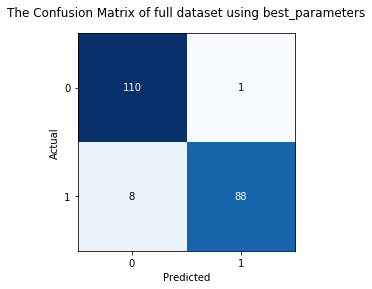

The accuracy is 95.65217391304348 %
The recall from the confusion matrix is 91.66666666666666 %


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


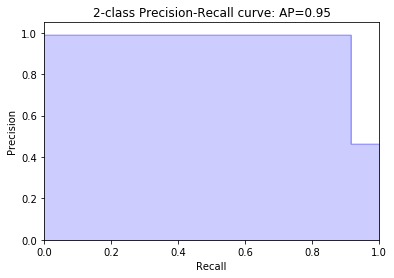

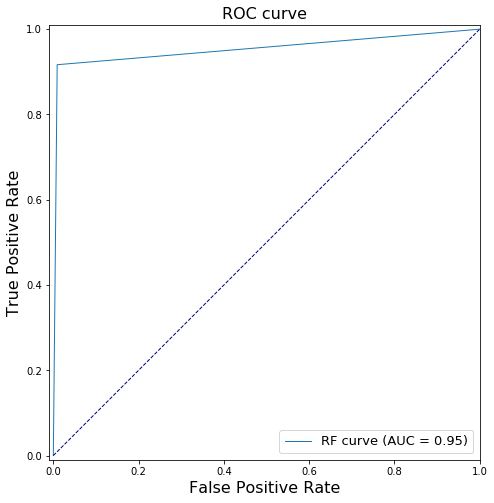

In [43]:
def confus_matrix(CM):
    fig, ax = plot_confusion_matrix(conf_mat= CM)
    plt.title("The Confusion Matrix of full dataset using best_parameters")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    print("The accuracy is "+str((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100) + " %")
    print("The recall from the confusion matrix is "+ str(CM[1,1]/(CM[1,0] + CM[1,1])*100) +" %")
confus_matrix(con_mat)

precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()